# Passos para o relatório

Título e nome dos integrantes;
• Introdução: motivação e objetivos da análise;
• Dados usados: descrição do(s) dataset(s) e exploração inicial dos dados;

• Pré-processamento: limpeza e transformação dos dados necessários, explicando as decisões tomadas;

• Perguntas: mostrar cada pergunta e executar o passo a passo para respondê-las (vocês devem utilizar regressão linear ou agrupamento em pelo menos uma pergunta);

• Conclusão: resumir os resultados encontrados e explicar por que são importantes. Apontar limitações, trabalhos futuros e melhorias que podem ser feitas.

Importar imagens, realizar explicações a respeito dos autores, temas que eles abordam e etc

# TED TALKS

### Uma análise dos vídeos criados ao longo de 52 anos

Desde seu surgimento o TED Talks tem o propósito de disseminar ideias por meio de conferências feitas na Europa, Ásia e Américas, de forma que além das conferências, existem os vídeos, a fim de possibilitar mais ainda a disseminação das ideias que merecem sê-las, conforme seu próprio slogan.

Esta análise tem como objetivo verificar como os vídeos do TED Talks se comportaram ao longo dos anos, em relação às visualizações, likes e quantidade de vídeos postados, bem como a progressão dos maiores autores sobre as ditas variáveis.

##### Discentes: Luís Henrique Augustoo de Lima e Rafael Barboza de Almeida

Inicialmente vamos importar as bibliotecas necessárias para o projeto e inicializar o dataset original.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from scipy.stats import linregress

In [2]:
df= pd.read_csv('TED_TALKS_data.csv').drop(columns =['link'])
df.head()

,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72


Para este dataset iremos modificar suas colunas em alguns momentos, além de criar dataframes auxiliares, cada um com seu fim específico, para organizar melhor os dados.

In [3]:
#Iicializando os datasets auxiliares e separando o ANO da coluna DATE no dataset original

df2 = pd.DataFrame()  # Em relação aos anos
df3 = pd.DataFrame()  # Em relação aos autores

df['date'] = pd.to_datetime(df['date'])
df['anos']= df['date'].dt.year
df.head()

,title,author,date,views,likes,anos
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,2022
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,2021


Agora iremos começar a coletar os dados mais específicos que serão utilizados para as futuras análises, agrupando-os nos dataframes já inicializados (df2 e df3).

### Coletando dados referente aos vídeos
##### Agrupando dados no dataframe 2 (df2)

In [4]:
#Agrupando todos os anos (sem repetições) do dataframe original

anossemrep = []
for c in df['anos']:
    if c not in anossemrep:
        anossemrep.append(c)
anossemrep = pd.DataFrame(anossemrep, columns = ['Ano']).sort_values(by="Ano", ascending=False).reset_index(drop=True)
df2['Anos'] = anossemrep

In [5]:
#Coletando a quantidade de vídeos postados por ano

contagemano= []
for c in anossemrep['Ano']:
    cont = 0
    for i in df['anos']:
        if c == i:
            cont += 1
    contagemano.append(cont)
contagemano = pd.DataFrame(contagemano, columns=['Quantidade de Vídeos'])
df2['Quantidade de Vídeos'] = contagemano

In [6]:
#Coletando as visualizações por ano

viewyear= []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['views'][n]
    viewyear.append(total)
viewyear = pd.DataFrame(viewyear, columns=['Visualização']).reset_index().drop(columns=['index'])
df2['Visualização'] = viewyear

In [7]:
#Coletando a quantidade de likes por ano

likes = []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['likes'][n]
    likes.append(total)
likes = pd.DataFrame(likes, columns=['Likes']).reset_index().drop(columns=['index'])
df2['Likes'] = likes

In [8]:
#Calculando a média de visualizações por ano

media_views = pd.DataFrame(viewyear['Visualização'] / contagemano['Quantidade de Vídeos'], columns=['Média de visualização']).round(2)
df2['Média de visualização'] = media_views

In [9]:
# Calculando a média de likes por ano

media_like = pd.DataFrame(df2['Likes'] / df2['Quantidade de Vídeos'], columns=['Média de likes']).round(2)
df2['Média de Likes'] = media_like

Agora, podemos ver como ficou o primeiro dataframe auxiliar após a coleta dos dados anteriores.

In [10]:
df2.head()

,Anos,Quantidade de Vídeos,Visualização,Likes,Média de visualização,Média de Likes
0,2022,20,11470000,341254,573500.00,17062.70
1,2021,390,429728700,13058238,1101868.46,33482.66
2,2020,501,635944200,19297014,1269349.70,38516.99
3,2019,544,948119299,28764575,1742866.36,52876.06
4,2018,473,811857597,24671493,1716400.84,52159.60


### Coletando dados referente aos autores
##### Agrupando dados no dataframe 3 (df3)

In [11]:
#Agrupando o nome de todos os autores (sem repetição)

autsemrep = []
for a in df['author']:
    if a not in autsemrep:
        autsemrep.append(a)
autsemrep = pd.DataFrame(autsemrep, columns = ['Autor'])
df3['Autor'] = autsemrep

In [12]:
#Coletando a quantidade de vídeos postados por cada autor

contagemaut= []
for c in autsemrep['Autor']:
    cont = 0
    for i in df['author']:
        if c == i:
            cont += 1
    contagemaut.append(cont)
contagemaut = pd.DataFrame(contagemaut, columns=['Quantidade de Vídeos'])
df3['Quantidade de Vídeos'] = contagemaut

In [13]:
#Coletando a quantidade de visualizações por autor

viewaut= []
for c in autsemrep['Autor']:
    total = 0
    for n ,i in enumerate(df['author']):
        if c == i:
            total += df['views'][n]
    viewaut.append(total)
viewaut = pd.DataFrame(viewaut, columns=['Visualizações totais']).reset_index().drop(columns=['index'])
df3['Visualizações totais'] = viewaut

In [14]:
#Coletando a quantidade de likes por autor

likesaut = []
for c in autsemrep['Autor']:
    total = 0
    for n ,i in enumerate(df['author']):
        if c == i:
            total += df['likes'][n]
    likesaut.append(total)
likesaut = pd.DataFrame(likesaut, columns=['Likes totais']).reset_index().drop(columns=['index'])
df3['Likes totais'] = likesaut

A seguir vamos utilizar mais alguns dataframes auxiliares para agruparem de forma mais específica alguns dados referentes aos autores, de forma que facilitarão na hora das análises referente a cada grupo.

In [15]:
# Agrupando os 10 maiores autores em relação à quantidade de vídeos postados

df3_vp = pd.DataFrame()
df3_vp = df3.sort_values(by='Quantidade de Vídeos', ascending = False).reset_index().drop(columns=['index']).iloc[0:5]

In [16]:
# Agrupando os 10 maiores autores em relação às visualizações totais

df3_vt = pd.DataFrame()
df3_vt = df3.sort_values(by='Visualizações totais', ascending = False).reset_index().drop(columns=['index']).iloc[0:5]

In [17]:
# Agrupando os 10 maiores autores em relação à quantidade de likes totais

df3_lt = pd.DataFrame()
df3_lt = df3.sort_values(by='Likes totais', ascending = False).reset_index().drop(columns=['index']).iloc[0:5]

In [18]:
# Organizando o df3 

df3 = df3.sort_values(by='Autor', ascending = True)
df3.head()

,Autor,Quantidade de Vídeos,Visualizações totais,Likes totais
2645,B.E.A.T. NYC,1,3200,98
633,Beautyrest,1,60000,1800
14,Belle and Sebastian,1,23000,690
800,Butterscotch,1,31000,933
1186,Climbing PoeTree,1,12000,367


# GRÁFICOS, REGRESSÃO, AGRUPAMENTO E ETC SERÃO UTILIZADOS PARA RESPONDER AS PERGUNTAS



# Perguntas

A partir do processamento dos dados, finalmente podemos começar a analisar o que os dados trazem consigo.

Inicialmente foram definidas as seguintes perguntas:

• Qual foi o TED Talk mais visualizado?
• Qual o TED Talk mais curtido?
• Qual o(a) palestrante mais famoso (de acordo com número de likes)?
• Qual o ano em que houve mais TED Talks lançados?
• Qual palestrante tem mais TED Talks?

Perguntas facilmente respondidas através dos DataFrames criados. Porém, à medida que o trabalho evoluiu, podemos perceber que seria possível incluir diversas perguntas, além de buscar mais informações específicas sobre determinados pontos. Sendo assim, a seguir iremos enumerar e demonstrar diversas observações que podemos obter a partir dos dados obtidos.

## O que podemos concluir através das variáveis obtidas pelos vídeos em si?
### Análises iniciais

Como foi explicado anteriormente, o DataFrame "df2" foi utilizado para coletar dados referentes aos vídeos, o DataFrame "df3" para coletar dados referentes aos autores eo DataFrame "df" foi a base inicial, que serviu para coletar dados como o número de visualizações por ano, média de visualizações e curtidas, quantidade de vídeos postados, etc. Desta forma, iremos utilizá-los para demonstrar as respostas das perguntas iniciais.

In [19]:
# Padronização do tamanho dos gráficos

plt.rcParams['figure.figsize']=(15,8)

In [20]:
# Qual o TED mais curtido?

df.sort_values(by="likes", ascending = False).head(1)

,title,author,date,views,likes,anos
5436,Do schools kill creativity?,Sir Ken Robinson,2006-02-01,72000000,2100000,2006


In [21]:
# Qual o TED mais visualizado?

df.sort_values(by="views", ascending = False).head(1)

,title,author,date,views,likes,anos
5436,Do schools kill creativity?,Sir Ken Robinson,2006-02-01,72000000,2100000,2006


Text(0.5, 1.0, 'Palestrantes com mais likes')

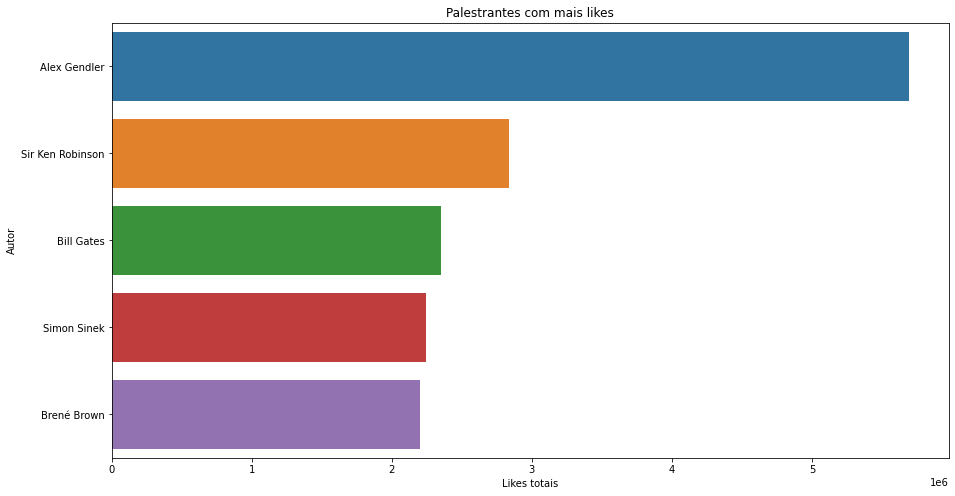

In [22]:
# Qual o(a) palestrante mais famoso (de acordo com o número de likes)?

sns.barplot(data=df3_lt, x="Likes totais", y="Autor").set_title("Palestrantes com mais likes")

Text(0.5, 1.0, 'Quantidade de vídeos postados por ano')

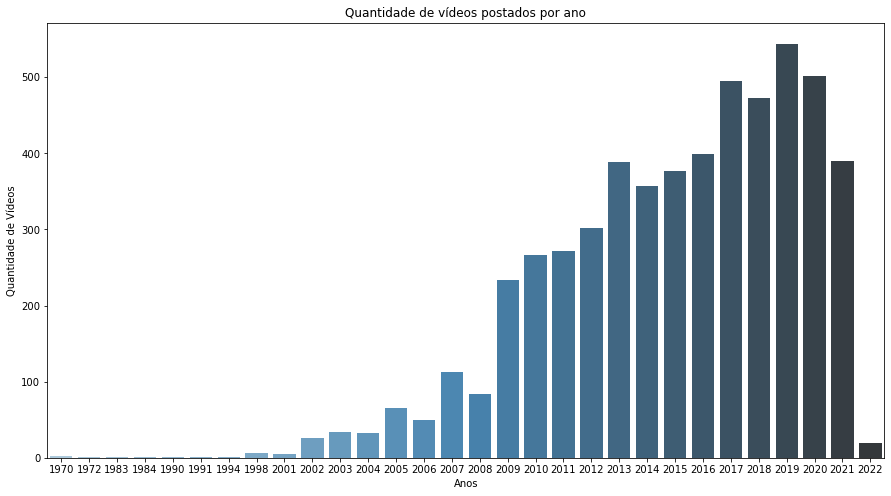

In [23]:
# Qual o ano em que houve mais TED Talks lançados?

sns.barplot(data=df2, x="Anos", y="Quantidade de Vídeos", palette="Blues_d").set_title('Quantidade de vídeos postados por ano')

Text(0.5, 1.0, 'Palestrantes com mais vídeos postados')

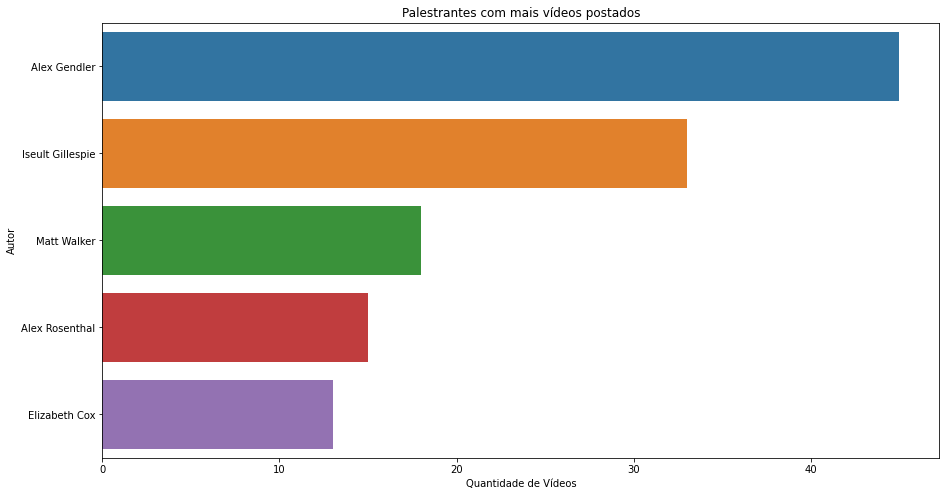

In [24]:
# Qual palestrante tem mais TED Talks?

sns.barplot(data=df3_vp, x="Quantidade de Vídeos", y="Autor").set_title("Palestrantes com mais vídeos postados")

### Análises posteriores

A partir de agora iremos tratar de outras variáveis, como também realizar o agrupamento de determinadas icógnitas e realizar os procedimentos requisitados para o relatório final.

### Regressão linear 

 Para a regressão linear utilizamos o gráfico da Quantidade de vídeos x Quantidade de likes como exemplo

<AxesSubplot:xlabel='Quantidade de Vídeos', ylabel='Likes'>

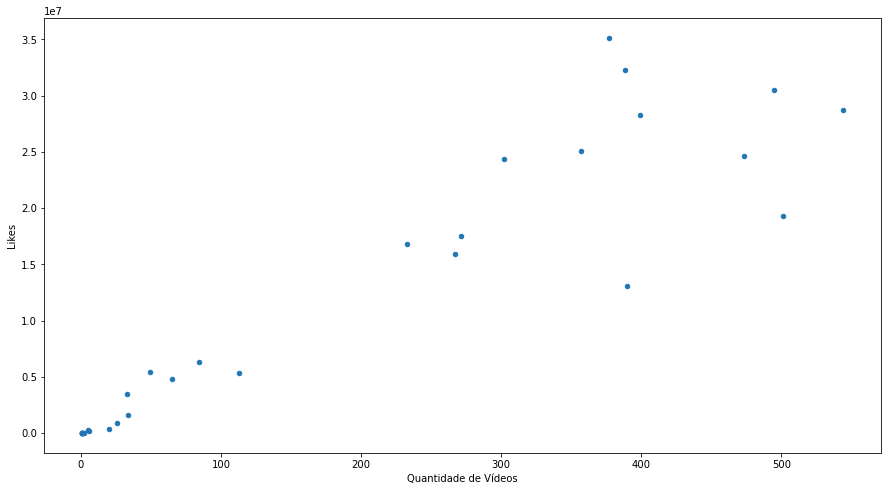

In [29]:
# Plotando o gráfico Vídeos x Likes

df2.plot.scatter(x='Quantidade de Vídeos', y='Likes')

In [26]:
# Calculando coeficiente angular e linear

coef_angular, coef_linear,_,_,std_err = linregress(df2['Quantidade de Vídeos'], df2['Likes'])

In [27]:
# A equação da reta se dará por:

reta = coef_angular * df2['Quantidade de Vídeos'] + coef_linear

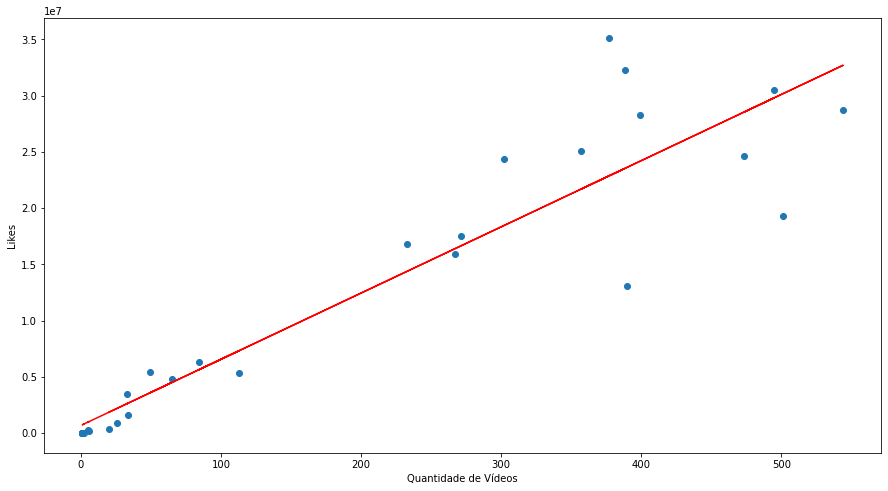

In [28]:
# Plotando o gráfico novamente, mas dessa vez com a reta da regressão linear

plt.scatter(df2['Quantidade de Vídeos'], df2['Likes'])
plt.plot(df2['Quantidade de Vídeos'], reta, color='red')
plt.xlabel('Quantidade de Vídeos')
plt.ylabel('Likes')
plt.show()

In [32]:
print(f"Se quisermos saber quantidade de likes que 700 vídeos dariam, pela regressão linear feita, a resposta é {(coef_angular * 700 + coef_linear)/1000000:.2f}M likes")

Se quisermos saber quantidade de likes que 700 vídeos dariam, pela regressão linear feita, a resposta é 41.89M likes
